In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
from datetime import datetime,time


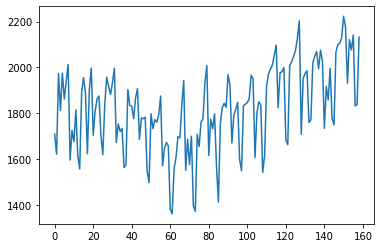

In [2]:
#from sm.tsa.statespace import sa
Amtrak = pd.read_csv("Amtrak (1).csv")
Amtrak.rename(columns={"Ridership ('000)":"Ridership"},inplace=True)
Amtrak.Ridership.plot() # time series plot 
# Creating a Date column to store the actual Date format for the given Month column
Amtrak["Date"] = pd.to_datetime(Amtrak.Month,format="%b-%y")

In [3]:
Amtrak["month"] = Amtrak.Date.dt.strftime("%b") # month extraction
#Amtrak["Day"] = Amtrak.Date.dt.strftime("%d") # Day extraction
#Amtrak["wkday"] = Amtrak.Date.dt.strftime("%A") # weekday extraction
Amtrak["year"] = Amtrak.Date.dt.strftime("%Y")

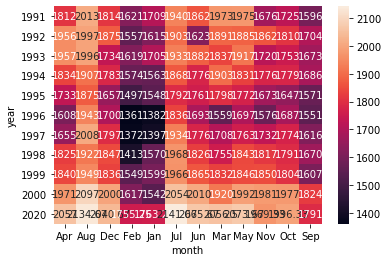

In [4]:
heatmap_y_month = pd.pivot_table(data=Amtrak,values="Ridership",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

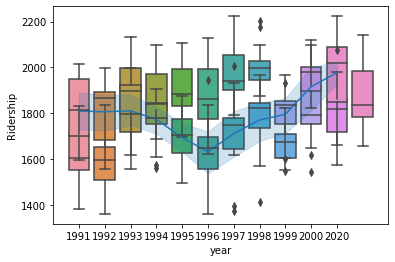

In [5]:
sns.boxplot(x="month",y="Ridership",data=Amtrak)
sns.boxplot(x="year",y="Ridership",data=Amtrak)
# sns.factorplot("month","Ridership",data=Amtrak,kind="box")

# Line plot for Ridership based on year
sns.lineplot(x="year",y="Ridership",data=Amtrak)

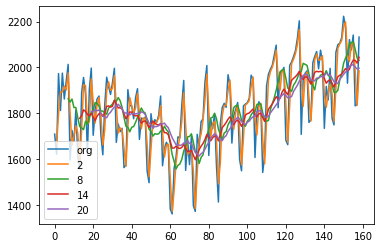

In [6]:
Amtrak.Ridership.plot(label="org")
for i in range(2,24,6):
    Amtrak["Ridership"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

C:\python\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  
C:\python\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


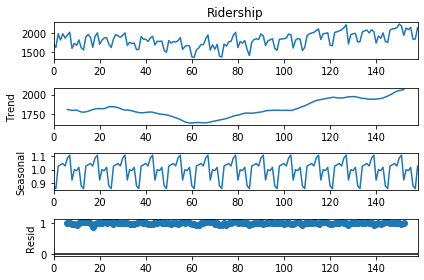

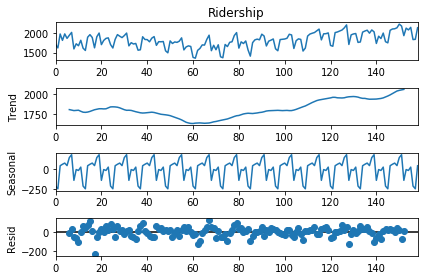

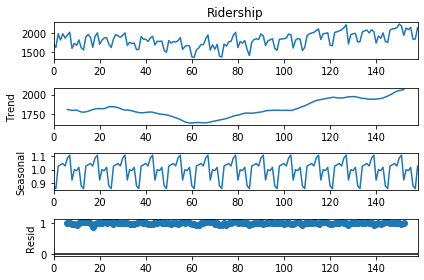

In [7]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(Amtrak.Ridership,model="additive",freq=12)
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(Amtrak.Ridership,model="multiplicative",freq=12)
decompose_ts_mul.plot()

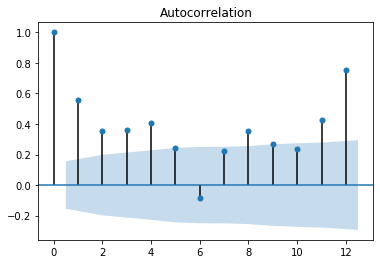

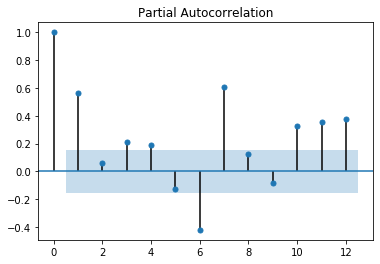

In [8]:
# ACF plots and PACF plots on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Amtrak.Ridership,lags=12)
tsa_plots.plot_pacf(Amtrak.Ridership,lags=12)

# Amtrak.index.freq = "MS" 
# splitting the data into Train and Test data and considering the last 12 months data as 
# Test data and left over data as train data 

Train = Amtrak.head(147)
Test = Amtrak.tail(12)
# to change the index value in panda

In [9]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)
Train["Ridership"] = Train["Ridership"].astype('double')



C:\python\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
ses_model = SimpleExpSmoothing(Train["Ridership"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ridership) # 7.846321

C:\python\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


8.284196790272484

In [11]:
# Holt method 
hw_model = Holt(Train["Ridership"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Ridership) # 7.261176729658341

7.981206085281904

In [12]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Ridership"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Ridership) # 4.500954

C:\python\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\python\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


3.2227587013934076

In [13]:
Train["Ridership"] = Train["Ridership"].astype('double')
Amtrak["Ridership"] = Amtrak["Ridership"].astype('double')
hwe_model_add_add = ExponentialSmoothing(Amtrak["Ridership"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Amtrak.index[0],end = Amtrak.index[-1])
pred_hwe_add_add

C:\python\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\python\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


0      1675.027112
1      1660.687426
2      1938.349260
3      1965.323450
4      1906.495155
          ...     
154    2079.250733
155    2122.771683
156    1889.471628
157    1823.505730
158    2131.756558
Length: 159, dtype: float64

In [14]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Ridership"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Ridership) # 4.109309

3.1182415458102795